---

#### Name: 陳永承
#### Student ID: 0712534

#### 2020 Introduction to Machine Learning Program Assignment #3 - Linear Regression & Logistic Regression
---

In [10]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn import preprocessing
#this hw lib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
import random
rand = np.random.normal(0, 0.5, 10000)

In [9]:
def K_Folds(data):
    indexNo = len(data) / 3
    return [data[round(indexNo * i):round(indexNo * (i + 1))] for i in range(3)]

def data_gen(x):
    y=[]
    for i in range(len(x)):
        y.append(3*x[i]*x[i]*x[i]+2*x[i]*x[i]-3*x[i]+1+rand[i])
    return y

## Linear Regression
### 1.Data Generation
用上方data_gen定義好的公式，其中的ϵi用np中的random.normal生成，並依其x[i]的i值決定數值

In [35]:
lin_X=[]
for i in range(1000):
    n = (random.random())*(2.5)-1.5
    lin_X.append(n)
lin_X=np.array(lin_X).reshape(-1, 1)
lin_y=np.array(data_gen(lin_X))

## 2.Data Preprocessing
用助教大顯神威提供的sklearn中的polynnomialFeatures，裡面的參數決定他有到最多幾次方，也就k值<br>
本次k值分別使用1/2/3/4

In [220]:
poly2 = PolynomialFeatures(2)
lin_X2=poly2.fit_transform(lin_X)

poly3 = PolynomialFeatures(3)
lin_X3=poly3.fit_transform(lin_X)

poly4 = PolynomialFeatures(4)
lin_X4=poly4.fit_transform(lin_X)

poly1 = PolynomialFeatures(1)
lin_X1=poly1.fit_transform(lin_X)

In [247]:
lin_X1

array([[ 1.        , -0.34603676],
       [ 1.        , -1.15214386],
       [ 1.        ,  0.0019394 ],
       ...,
       [ 1.        ,  0.66794986],
       [ 1.        , -0.62695955],
       [ 1.        , -0.48685845]])

## 3.Model Construction
用sklearn中的LinearRegression即可造出model，data放入.fit就訓練完了

In [221]:
reg2 = LinearRegression().fit(lin_X2, lin_y)
reg3 = LinearRegression().fit(lin_X3, lin_y)
reg4 = LinearRegression().fit(lin_X4, lin_y)
reg1 = LinearRegression().fit(lin_X1, lin_y)

## 5.Results
### Show the fitted weights and the equations
LinearRegression的.coef_可以顯示出他使用的fitted weights<br>
把參數對上x的次方數就是他的回歸公式<br>
yi的i表示這個方程式最高幾次，也就是前面的k值

In [259]:
w1=reg1.coef_
print("y1= "+str(reg1.intercept_[0])+" "+str(w1[0][1])+"x")
w2=reg2.coef_
print("y2= "+str(reg2.intercept_[0])+" "+str(w2[0][1])+"x "+str(w2[0][2])+"x^2")
w3=reg3.coef_
print("y3= "+str(reg3.intercept_[0])+" "+str(w3[0][1])+"x +"+str(w3[0][2])+"x^2 +"+str(w3[0][3])+"x^3")
w4=reg4.coef_
print("y4= "+str(reg4.intercept_[0])+" "+str(w4[0][1])+"x +"+str(w4[0][2])+"x^2 +"+str(w4[0][3])+"x^3 "+str(w4[0][4])+"x^4")



y1= 1.5565663160749406 -0.5995552049178808x
y2= 1.6710743053117967 -0.732307225072745x -0.2543149489707846x^2
y3= 1.0334882815557045 -2.9254736884289625x +1.995324672119247x^2 +2.9619810489266283x^3
y4= 1.0319687285286907 -2.9181781189877585x +2.006750106943275x^2 +2.949883485351909x^3 -0.012005234029662623x^4


### Show the predicted y^ for −1.5<x<1.0
用plt.scatter，再把data跟預測值放入參數中即可

k=1


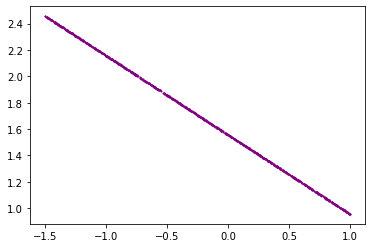

In [226]:
print("k=1")
plt.scatter(lin_X, reg1.predict(lin_X1),color='purple',s=1)

k=2


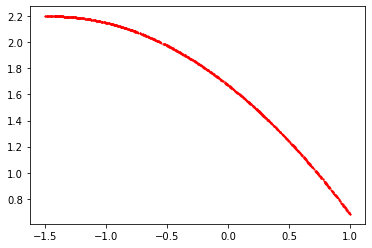

In [227]:
print("k=2")
plt.scatter(lin_X, reg2.predict(lin_X2),color='red',s=1)


K=3


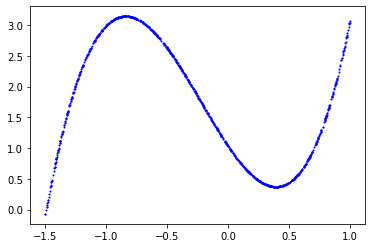

In [228]:
print('K=3')
plt.scatter(lin_X, reg3.predict(lin_X3),color='blue',s=1)


K=4


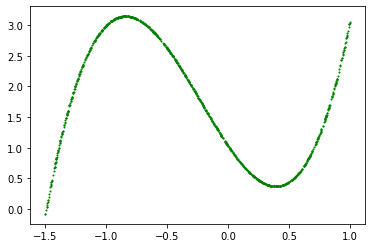

In [229]:
print('K=4')
plt.scatter(lin_X, reg4.predict(lin_X4),color='green',s=1)

### Bonus - show the results in a single figure
將原先的分布點及上述預測的線放入scatter中即可<br>
紫色線為k=1，紅色線為k=2，藍色線為k=3，綠色線為k=4，橘色點點為原data的分布

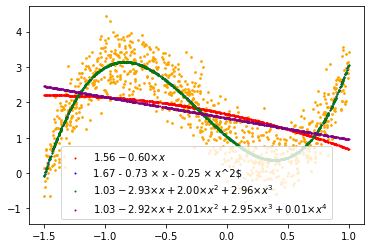

In [260]:
a=plt.gca()
plt.scatter(lin_X,lin_y,color='orange',s=3)
a.scatter(lin_X, reg2.predict(lin_X2),color='red',s=1,label=r'$1.56 - 0.60 × x$')
a.scatter(lin_X, reg3.predict(lin_X3),color='blue',s=1,label=r'1.67 - 0.73 × x - 0.25 × x^2$')
a.scatter(lin_X, reg4.predict(lin_X4),color='green',s=1,label=r'$1.03 - 2.93 × x + 2.00 × x^2 + 2.96 × x^3$')
a.scatter(lin_X, reg1.predict(lin_X1),color='purple',s=1,label=r'$1.03 - 2.92 × x + 2.01 × x^2 + 2.95 × x^3 + 0.01 × x^4$')
a.legend()

## Logistic Regression
### 1.Data Generation
用大顯神威的助教再discode提供的np.random.multivariate_normal即可<br>
第一個參數是[0,0]跟[1,1]，第二個參數放作業公式中的矩陣，最後面各生成1000個再合併<br>
合併時取亂數，接近0的y為0，接近1的y為1

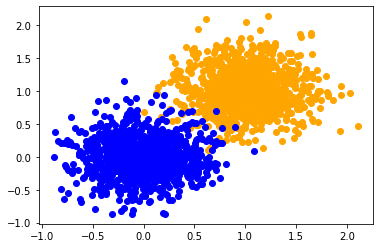

In [198]:
x1, y1 = np.random.multivariate_normal([1,1], [[0.1,0],[0,0.1]], 1000).T
plt.scatter((x1),(y1),color='orange')
x0, y0 = np.random.multivariate_normal([0,0], [[0.1,0],[0,0.1]], 1000).T
plt.scatter((x0),(y0),color='blue')

In [202]:
y1=np.array(y1).T
log_x=[]
log_y=[]
for i in range(1000):
    n = random.random()
    if n>(1-n):
        temp=[]
        temp.append(x1[i])
        temp.append(y1[i])
        log_x.append(temp)
        log_y.append(1)
    else:
        temp=[]
        temp.append(x0[i])
        temp.append(y0[i])
        log_x.append(temp)
        log_y.append(0)


### 2.Model Construction
用sklearn中的LogisticRegression，將資料放入.fit中即可訓練完成

In [203]:
clf = LogisticRegression(random_state=0).fit(log_x,log_y)

### 4.Results 
##### Show the model accuracy 
用LogisticRegression的.score放入feature與label及可預測完畢

In [204]:
print("model accuracy "+str(clf.score(log_x,log_y)))

model accuracy 0.988


##### Show the model weights and the corresponded terms
用LogisticRegression的.coef_取得參數，並把參數放到對應的xi即可

In [263]:
co=clf.coef_
print("yi=L("+str(clf.intercept_[0])+" + "+str(co[0][0])+"*xi0 + "+str(co[0][1])+"*xi1"+")")

yi=L(-5.075349484218265 + 4.9511713908376*xi0 + 5.245944320168285*xi1)


##### Bonus - show the decision boundary with a figure
用了跟第二次作業差不多的方法，用先前的方法訓練。訓練完後將範圍一個一個點放入訓練結果後<br>
拿該區間每隔0.02用numpy的meshgrid分隔個點做預測，再依預測結果用matplotlib.pyplot中的pcolormesh塗上對應顏色(ListedColormap中的顏色)。<br>
接者把原先的點也放入scatter中塗上顏色

<ipython-input-206-d3d93b153d4a>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=ListedColormap(['green','yellow']))


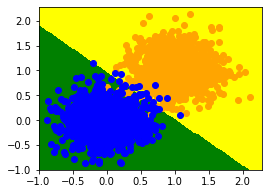

In [206]:
from matplotlib.colors import ListedColormap
x_min, x_max = -1,2.3
y_min, y_max =-1,2.3
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=ListedColormap(['green','yellow']))
plt.scatter((x1),(y1),color='orange')
plt.scatter((x0),(y0),color='blue')
plt.show()